In [115]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this er

In [116]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# Load the data
df_main = pd.read_csv("../datasets/life_expectancy_dataset.csv", delimiter=";")

# General Information
print(df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13545 entries, 0 to 13544
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country_code           13545 non-null  object
 1   country_name           13545 non-null  object
 2   region                 13545 non-null  object
 3   sub-region             13545 non-null  object
 4   intermediate-region    5670 non-null   object
 5   year                   13545 non-null  int64 
 6   life_expectancy_women  13545 non-null  object
 7   life_expectancy_men    13545 non-null  object
dtypes: int64(1), object(7)
memory usage: 846.7+ KB
None


In [118]:
# Display the many examples of life expectancy

df_sample = df_main.sample(10)
display(df_sample)

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
7486,LTU,LITUANIA,EUROPE,NORTHERN EUROPE,NaN,2012,"79,60","68,40"
3821,ESP,ESPAÑA,EUROPE,SOUTHERN EUROPE,NaN,2001,"82,80","76,10"
3673,ERI,ERITREA,AFRICA,SUB-SAHARAN AFRICA,EASTERN AFRICA,1979,"46,87","41,23"
5461,HKG,"HONG KONG, REGIÓN ADMINISTRATIVA ESPECIAL",ASIA,EASTERN ASIA,NaN,2003,"84,35","78,48"
6744,JOR,JORDANIA,ASIA,WESTERN ASIA,NaN,1963,"56,20","55,04"
10906,KNA,SAINT KITTS Y NEVIS,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,1967,"62,40","58,28"
7468,LTU,LITUANIA,EUROPE,NORTHERN EUROPE,NaN,1994,"74,82","62,54"
9545,PAN,PANAMÁ,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CENTRAL AMERICA,1992,"74,89","68,33"
6354,TCA,ISLAS TURCAS Y CAICOS,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,2014,"79,77","74,77"
3751,SVN,ESLOVENIA,EUROPE,SOUTHERN EUROPE,NaN,1994,"77,40","69,60"


In [119]:
# delete many columns
cols = ["sub-region", "intermediate-region"]
df_main = df_main.drop(cols, axis=1)

# change name columns

new_cols={
    "life_expectancy_women":"female",
    "life_expectancy_men":"male"
}

df_main=df_main.rename(columns=new_cols)

# Display columns
print(df_main.columns)

Index(['country_code', 'country_name', 'region', 'year', 'female', 'male'], dtype='object')


In [120]:
# Get the first element of the string
df_main['female'] = df_main['female'].str.split(",").str[0]
df_main["male"] = df_main['male'].str.split(",").str[0]

# Convert to int
df_main['male'] = df_main['male'].astype(int)
df_main['female'] = df_main['female'].astype(int)

In [121]:
# show countries
display(df_main['country_name'].unique())

# show total count country
len(df_main['country_name'].unique().tolist())

# show count by country
df_main['country_code'].value_counts(ascending=False)



array(['AFGANISTÁN', 'ALBANIA', 'ALEMANIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA Y BARBUDA', 'ARABIA SAUDITA', 'ARGELIA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIYÁN',
       'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BELARÚS',
       'BELICE', 'BENIN', 'BERMUDAS', 'BHUTÁN', 'BOLIVIA',
       'BOSNIA Y HERZEGOVINA', 'BOTSWANA', 'BRASIL', 'BRUNEI DARUSSALAM',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'BÉLGICA', 'CABO VERDE',
       'CAMBOYA', 'CAMERÚN', 'CANADÁ', 'CHAD', 'CHILE', 'CHINA', 'CHIPRE',
       'COLOMBIA', 'COMORAS', 'CONGO, REPÚBLICA DEL',
       'CONGO, REPÚBLICA DEMOCRÁTICA DEL', 'COREA, REPÚBLICA DE',
       'COREA, REPÚBLICA POPULAR DEMOCRÁTICA DE', 'COSTA RICA', 'CROACIA',
       'CUBA', 'CURACAO', "CÔTE D'IVOIRE", 'DINAMARCA', 'DJIBOUTI',
       'DOMINICA', 'ECUADOR', 'EGIPTO, REPÚBLICA ÁRABE DE', 'EL SALVADOR',
       'EMIRATOS ÁRABES UNIDOS', 'ERITREA', 'ESLOVENIA', 'ESPAÑA',
       'ESTADOS UNIDOS', 'ESTONIA', 'ESWATINI', 'E

country_code
AFG    63
ALB    63
DEU    63
AND    63
AGO    63
       ..
VEN    63
VNM    63
YEM    63
ZMB    63
ZWE    63
Name: count, Length: 215, dtype: int64

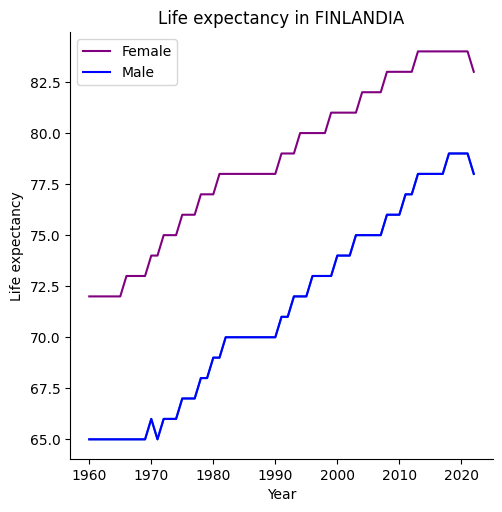

In [122]:
country = "FINLANDIA"

df_filter = df_main[(df_main['country_name'] == country)]

sns.relplot(data=df_filter,x="year",y='male',kind='line')
plt.plot(df_filter['year'], df_filter['female'], label='Female', color='purple')
plt.plot(df_filter['year'], df_filter['male'], label='Male', color='blue')
plt.title(f'Life expectancy in {country}')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.legend()
plt.show()

In [123]:
# divide df in two

df_female = df_main.drop("male", axis=1)
df_female = df_female.rename(columns={"female":"age"})
df_female['sex'] = "female"
display(df_female)

df_male = df_main.drop("female", axis=1)
df_male = df_male.rename(columns={"male":"age"})
df_male['sex'] = "male"
display(df_male)

df_combine = pd.concat([df_female, df_male], ignore_index=True)
display(df_combine)

,country_code,country_name,region,year,age,sex
0,AFG,AFGANISTÁN,ASIA,1960,33,female
1,AFG,AFGANISTÁN,ASIA,1961,33,female
2,AFG,AFGANISTÁN,ASIA,1962,34,female
3,AFG,AFGANISTÁN,ASIA,1963,34,female
4,AFG,AFGANISTÁN,ASIA,1964,35,female
...,...,...,...,...,...,...
13540,ZWE,ZIMBABWE,AFRICA,2018,63,female
13541,ZWE,ZIMBABWE,AFRICA,2019,63,female
13542,ZWE,ZIMBABWE,AFRICA,2020,63,female
13543,ZWE,ZIMBABWE,AFRICA,2021,62,female


,country_code,country_name,region,year,age,sex
0,AFG,AFGANISTÁN,ASIA,1960,31,male
1,AFG,AFGANISTÁN,ASIA,1961,32,male
2,AFG,AFGANISTÁN,ASIA,1962,32,male
3,AFG,AFGANISTÁN,ASIA,1963,33,male
4,AFG,AFGANISTÁN,ASIA,1964,33,male
...,...,...,...,...,...,...
13540,ZWE,ZIMBABWE,AFRICA,2018,58,male
13541,ZWE,ZIMBABWE,AFRICA,2019,58,male
13542,ZWE,ZIMBABWE,AFRICA,2020,58,male
13543,ZWE,ZIMBABWE,AFRICA,2021,56,male


,country_code,country_name,region,year,age,sex
0,AFG,AFGANISTÁN,ASIA,1960,33,female
1,AFG,AFGANISTÁN,ASIA,1961,33,female
2,AFG,AFGANISTÁN,ASIA,1962,34,female
3,AFG,AFGANISTÁN,ASIA,1963,34,female
4,AFG,AFGANISTÁN,ASIA,1964,35,female
...,...,...,...,...,...,...
27085,ZWE,ZIMBABWE,AFRICA,2018,58,male
27086,ZWE,ZIMBABWE,AFRICA,2019,58,male
27087,ZWE,ZIMBABWE,AFRICA,2020,58,male
27088,ZWE,ZIMBABWE,AFRICA,2021,56,male


In [124]:
import mlflow
from mlflow.models.signature import infer_signature
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder



In [125]:
# selection of many counntry by code
country_code = ["FRA", "USA", "ESP", "GBR", "ITA", "DEU", "BEL", "NLD", "DNK", "FIN", "NOR", "SWE", "CHE", "AUT", "IRL", "PRT", "GRC"]
df_combine = df_combine[df_combine['country_code'].isin(country_code)]
display(df_combine['country_code'].unique())

array(['DEU', 'AUT', 'BEL', 'DNK', 'ESP', 'USA', 'FIN', 'FRA', 'GRC',
       'IRL', 'ITA', 'NOR', 'NLD', 'PRT', 'GBR', 'SWE', 'CHE'],
      dtype=object)

In [126]:
# Encode the categorical variables
le_sex = LabelEncoder()
le_country_code = LabelEncoder()
le_year = LabelEncoder()

# Select the features and the target
X = df_combine.drop(['age','region','country_name'],axis=1)
y = df_combine['age']

# Encode the categorical variables
X['sex'] = le_sex.fit_transform(X['sex'])
X['year'] = le_year.fit_transform(X['year'])
X['country_code'] = le_country_code.fit_transform(X['country_code'])



In [127]:

# setting mlflow
mlflow.set_tracking_uri('http://localhost:8080')
mlflow.set_experiment('life')

<Experiment: artifact_location='mlflow-artifacts:/554428029278021550', creation_time=1743087095300, experiment_id='554428029278021550', last_update_time=1743087095300, lifecycle_stage='active', name='life', tags={}>

In [128]:


with mlflow.start_run(log_system_metrics=True) as run:
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=87)

    # Create the model
    model = Lasso(fit_intercept=True, alpha=0.5, random_state=87, max_iter=10000)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # add metrics
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    # add tags
    mlflow.set_tag("model", "Lasso")
    mlflow.set_tag("Hyperparameters", "no")

    # add parameters
    mlflow.log_param("database", "../datasets/life_expectancy_dataset.csv")
    signature = infer_signature(X_train, model.predict(X_train))
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="temperature_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="expectation_life_model",
    )



2025/03/27 16:10:14 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/03/27 16:10:14 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
/usr/local/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
R

🏃 View run fortunate-cow-627 at: http://localhost:8080/#/experiments/554428029278021550/runs/2eae016350644f30bfd3af7476980190
🧪 View experiment at: http://localhost:8080/#/experiments/554428029278021550


In [129]:
with mlflow.start_run(log_system_metrics=True) as run:  
    
    params_grid = {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [100],
        "positive": [True, False]
    }

    # Create the model
    lr = Lasso()
    params_grid = {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
        'fit_intercept': [True, False],
        'max_iter': [1000, 5000, 10000],
        'tol': [0.0001, 0.001, 0.01],
        'selection': ['cyclic', 'random']
    }

    model = GridSearchCV(lr, params_grid, cv=20, n_jobs=150, verbose=10)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.best_estimator_.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # add metrics
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    # add tags
    mlflow.set_tag("model", "Lasso")
    mlflow.set_tag("Hyperparameters", "yes")

    # add parameters
    mlflow.log_param("database", "life_expectancy_dataset.csv")
    signature = infer_signature(X_train, model.predict(X_train))
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="temperature_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="expectation_life_model",
    )
    



2025/03/27 16:10:19 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/03/27 16:10:19 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


Fitting 20 folds for each of 180 candidates, totalling 3600 fits
[CV 1/20; 1/180] START alpha=0.1, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001
[CV 1/20; 1/180] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001;, score=0.896 total time=   0.0s
[CV 2/20; 1/180] START alpha=0.1, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001
[CV 2/20; 1/180] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=cyclic, tol=0.0001;, score=0.931 total time=   0.1s
[CV 2/20; 5/180] START alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.001
[CV 2/20; 5/180] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.001;, score=0.931 total time=   0.0s
[CV 7/20; 5/180] START alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.001
[CV 7/20; 5/180] END alpha=0.1, fit_intercept=True, max_iter=1000, selection=random, tol=0.001;, score=0.916 total time=   0.0s
[CV 11/20; 5/180] START alpha=0

/usr/local/lib/python3.13/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'expectation_life_model' already exists. Creating a new version of this model...
2025/03/27 16:11:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: expec

🏃 View run wistful-crow-932 at: http://localhost:8080/#/experiments/554428029278021550/runs/443dcf67bed54a02b7e7607c9afe8ec4
🧪 View experiment at: http://localhost:8080/#/experiments/554428029278021550
